<a href="https://colab.research.google.com/github/NiyazovIlia/Python-Data-Science/blob/lesson-8/course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Real_Estate_Price_Prediction**

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


real_estate_price_prediction = pd.read_csv('Real_Estate_Price_Prediction.csv')
real_estate_price_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [2]:
real_max = pd.DataFrame(real_estate_price_prediction[{'Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Price'}].max(), dtype=np.int64).rename(columns={0:'real_max'})
real_min = pd.DataFrame(real_estate_price_prediction[{'Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Price'}].min(), dtype=np.int64).rename(columns={0:'real_min'})
real_mean = pd.DataFrame(real_estate_price_prediction[{'Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Price'}].mean(), dtype=np.int64).rename(columns={0:'real_mean'})
real_new = pd.concat([real_max, real_min, real_mean], axis=1)
real_new

,real_max,real_min,real_mean
Floor,42,1,8
Square,641,1,56
HouseYear,20052011,1910,3990
Price,633233,59174,214138
Helthcare_2,6,0,1
Social_1,74,0,24
Shops_1,23,0,4
DistrictId,209,0,50
Healthcare_1,4849,0,1142
Ecology_1,0,0,0


In [3]:
real_estate_price_prediction.value_counts()

Id     DistrictId  Rooms  Square      LifeSquare  KitchenSquare  Floor  HouseFloor  HouseYear  Ecology_1     Ecology_2  Ecology_3  Social_1  Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1  Shops_2  Price        
16798  22          1.0    39.956966   19.874715   8.0            2      17.0        1989       1.332153e-01  B          B          49        11395     3         1406.0        3            4        A        183467.407815    1
5579   90          2.0    52.512769   30.133454   8.0            16     17.0        1988       2.460315e-01  B          A          22        3151      4         2715.0        3            3        B        314948.199380    1
5569   118         4.0    100.243221  67.756645   8.0            4      9.0         1964       2.184397e-01  B          B          21        4472      6         1450.0        4            7        A        482603.543577    1
5570   140         1.0    39.702308   22.236080   8.0            10     12.0        2001       2.386171e-

In [4]:
real_null = pd.DataFrame(real_estate_price_prediction.isnull().sum())
real_null

,0
Id,0
DistrictId,0
Rooms,0
Square,0
LifeSquare,2113
KitchenSquare,0
Floor,0
HouseFloor,0
HouseYear,0
Ecology_1,0


Как мы видим из последних данных, есть пустые значения который будут мешать нам в дальнейшем, так же есть некорректность данных, к примеру максимальное значение размеров кухни 2014, такого не может быть.

**Построить график распределения целевой переменной. Сделать выводы.**

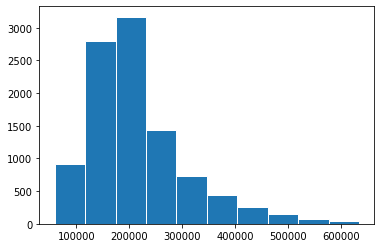

In [5]:
price = real_estate_price_prediction['Price']
plt.hist(price, ec="white")
plt.show()
#больше всего суммы приближенные к 200000

**Построить гистограммы для наиболее проблемных признаков (используйте выводы из первого ДЗ). Сделайте по ним выводы.**

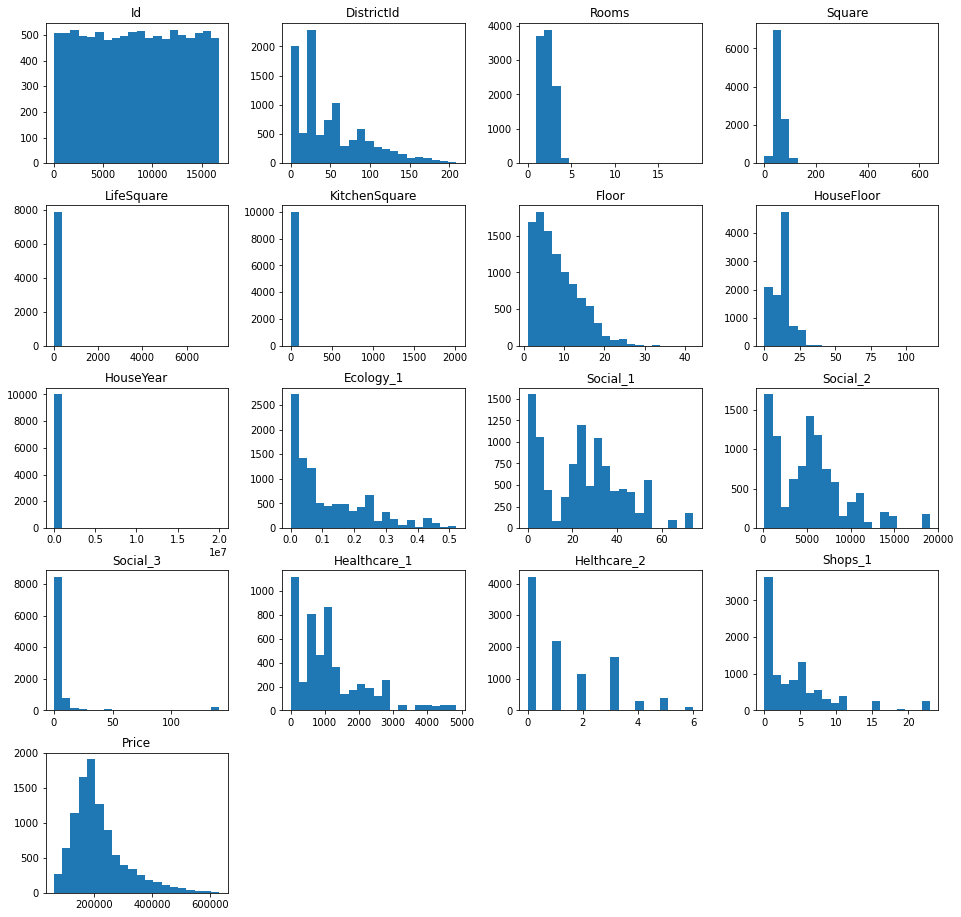

In [6]:
real_estate_price_prediction.hist(figsize=(16,16), bins=20, grid=False)
plt.show()

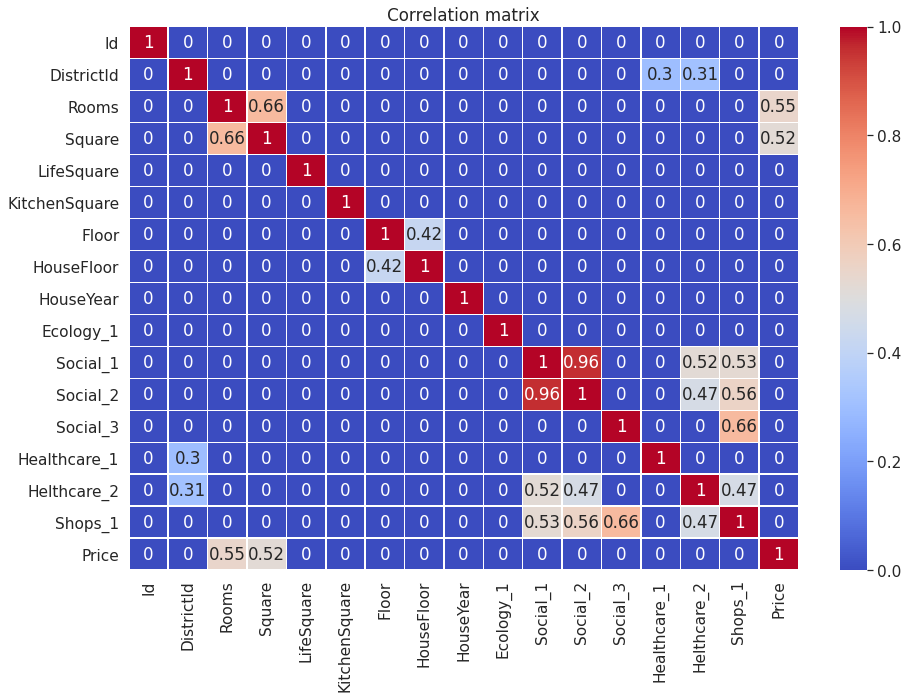

In [7]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.4)

corr_matrix = real_estate_price_prediction.corr() # вызов корреляции
corr_matrix = np.round(corr_matrix, 2) # сколько знаки после запятой
corr_matrix[np.abs(corr_matrix) < 0.3] = 0 # все что меньше 0,3 по модулю равно 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm') # строим матрицу корреляций

plt.title('Correlation matrix')
plt.show()

**Примените модель понижения размерности к вашим данным, визуализируйте их.**

In [8]:
# Будем использовать понижение размерности TSNE, только для визуализации!!!
# пока удалим данные где значения NAN

from sklearn.model_selection import train_test_split

X = pd.DataFrame(real_estate_price_prediction, columns=real_estate_price_prediction.columns)
X.dropna(subset=['LifeSquare', 'Healthcare_1'], inplace=True)
y = pd.DataFrame(X['Price'])

X_new = X.drop(['Price', 'Ecology_2', 'Ecology_3', 'Shops_2'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_new, y)

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [10]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=150, random_state=100)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(3342, 16)
После:	(3342, 2)


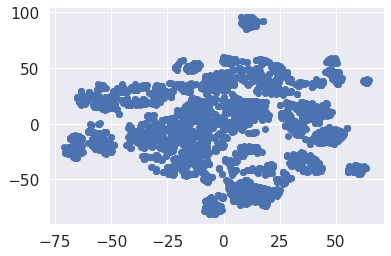

In [11]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

**Сделаем кластеризацию**

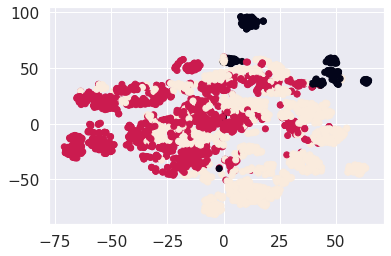

In [12]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state=100)
labels_train = model.fit_predict(X_train_scaled)
labels_test = model.fit_predict(X_test_scaled)


plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()

lr.fit(X_train_scaled, y_train)

y_test_pred = lr.predict(X_test_scaled)

r2_score(y_test, y_test_pred)

-1.6785939280988291

In [14]:
X_train_scaled_new = X_train_scaled
X_train_scaled_new['claster'] = labels_train

X_test_scaled_new = X_test_scaled
X_test_scaled_new['claster'] = labels_test

lr.fit(X_train_scaled_new, y_train)

y_test_pred = lr.predict(X_test_scaled_new)

r2_score(y_test, y_test_pred)

-1.5161989618223775

In [15]:
lr.fit(X_train_scaled_new.loc[labels_train == 0], y_train[labels_train == 0])

y_test_pred_0 = lr.predict(X_test_scaled_new.loc[labels_test == 0])

r2_score(y_test[labels_test == 0], y_test_pred_0)

-0.4949171688448404

In [16]:
lr.fit(X_train_scaled_new.loc[labels_train == 1], y_train[labels_train == 1])

y_test_pred_1 = lr.predict(X_test_scaled_new.loc[labels_test == 1])

r2_score(y_test[labels_test == 1], y_test_pred_1)

nan

In [17]:
lr.fit(X_train_scaled_new.loc[labels_train == 2], y_train[labels_train == 2])

y_test_pred_2 = lr.predict(X_test_scaled_new.loc[labels_test == 2])

r2_score(y_test[labels_test == 2], y_test_pred_2)

0.19889777264150799

**Значения вышли не очень хорошие, грешу на то что удалил строки где пустые значения**